In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 '001_Count_Vectorizer_TF_IDF.ipynb',
 'glove.42B.300d.txt',
 'imdb_movie_reviews.csv']

In [4]:
# load data
df = pd.read_csv("imdb_movie_reviews.csv")

df = df[:2000]

In [5]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [6]:
# Text cleaning
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
#     # 4. Stemming 
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(word) for word in tokens] 
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
#     return cleaned_text, lang, bigrams
    return cleaned_text

In [8]:
df['review'].iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
df['review'] = df['review'].apply(preprocess_text)

In [10]:
df['review'][0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bit

In [11]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


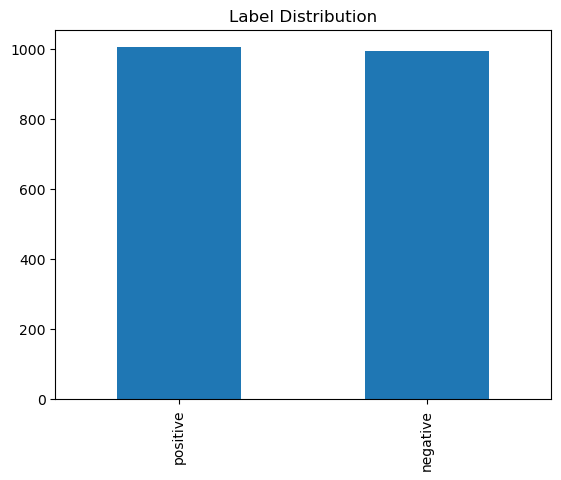

In [12]:
# 1. Label Distribution

import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

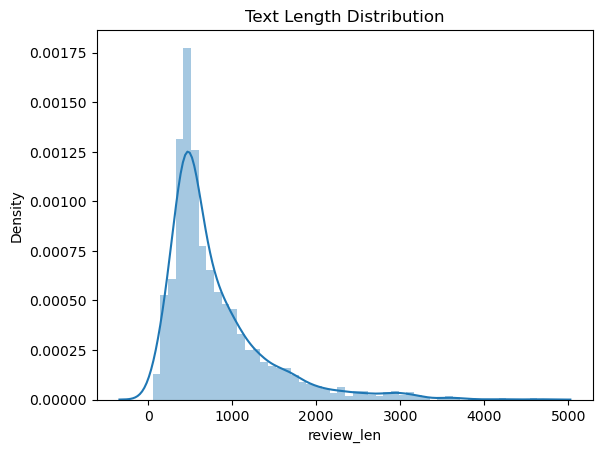

In [13]:
#2 Text Length Distributions

df['review_len'] = df['review'].apply(len)
sns.distplot(df['review_len'])
plt.title('Text Length Distribution')
plt.show()

In [14]:
# Most Least Frequent Words
from collections import Counter

all_words = ' '.join(df['review']).split()
word_freq = Counter(all_words)
print("Most Common Words:", word_freq.most_common(10))
print("Least Common Words:", word_freq.most_common()[:-10-1:-1])

Most Common Words: [('movie', 4043), ('film', 3455), ('one', 2015), ('like', 1510), ('good', 1100), ('character', 1088), ('time', 1076), ('get', 1050), ('even', 992), ('would', 981)]
Least Common Words: [('writerthe', 1), ('realisticlooks', 1), ('intervened', 1), ('believablewith', 1), ('newbie', 1), ('hulce', 1), ('flunkie', 1), ('regressed', 1), ('celebs', 1), ('antz', 1)]


In [15]:
df.head(2)

,review,sentiment,review_len
0,one reviewer mentioned watching oz episode you...,positive,1125
1,wonderful little production filming technique ...,positive,640


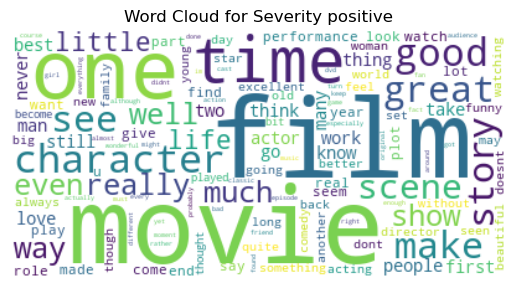

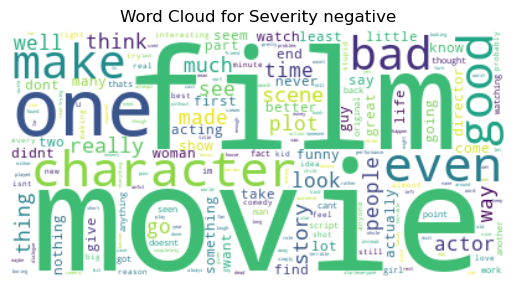

In [16]:
#word clouds for Each Label
from wordcloud import WordCloud

for label in df['sentiment'].unique():
    subset = df[df['sentiment'] == label]
    all_text = ' '.join(subset['review'])
    wordcloud = WordCloud(background_color='white').generate(all_text)
    plt.figure()
    plt.title(f"Word Cloud for Severity {label}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [17]:
# N-gram ANalysis

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text, n, k):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:k]

print("Top 10 bigrams:", get_top_ngrams(df['review'], 2, 10))

Top 10 bigrams: [('look like', 106), ('ever seen', 95), ('special effect', 94), ('ive seen', 88), ('movie like', 82), ('main character', 76), ('even though', 76), ('dont know', 73), ('see movie', 71), ('one best', 71)]


In [18]:
# Part of Speech Taggin - POS

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
from nltk.tokenize import word_tokenize

# Tokenizing the text
df['tokens'] = df['review'].apply(word_tokenize)

# Apply POS tagging
df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)

# Example to show the tags of the first ticket
print(df['pos_tags'].iloc[0][:10])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('one', 'CD'), ('reviewer', 'NN'), ('mentioned', 'VBD'), ('watching', 'VBG'), ('oz', 'JJ'), ('episode', 'NN'), ('youll', 'NN'), ('hooked', 'VBD'), ('right', 'RB'), ('exactly', 'RB')]


In [19]:
df.head()

,review,sentiment,review_len,tokens,pos_tags
0,one reviewer mentioned watching oz episode you...,positive,1125,"[one, reviewer, mentioned, watching, oz, episo...","[(one, CD), (reviewer, NN), (mentioned, VBD), ..."
1,wonderful little production filming technique ...,positive,640,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,thought wonderful way spend time hot summer we...,positive,580,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,basically there family little boy jake think t...,negative,446,"[basically, there, family, little, boy, jake, ...","[(basically, RB), (there, EX), (family, NN), (..."
4,petter matteis love time money visually stunni...,positive,851,"[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti..."


In [20]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk

# Ensure you have a DataFrame df with a pos_tags column
# Example: df['pos_tags'] should look something like: [(‘America’, 'NNP'), (‘is’, 'VBZ'), (‘great’, 'JJ')]

def named_entity_recognition(pos_tags):
    tree = ne_chunk(pos_tags)
    named_entities = []
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            entity_name = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            named_entities.append((entity_name, entity_type))
    return named_entities

# Assuming df['pos_tags'] contains POS-tagged tokens
df['named_entities'] = df['pos_tags'].apply(named_entity_recognition)

# Example output
print(df['named_entities'].iloc[:6])


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


0    []
1    []
2    []
3    []
4    []
5    []
Name: named_entities, dtype: object


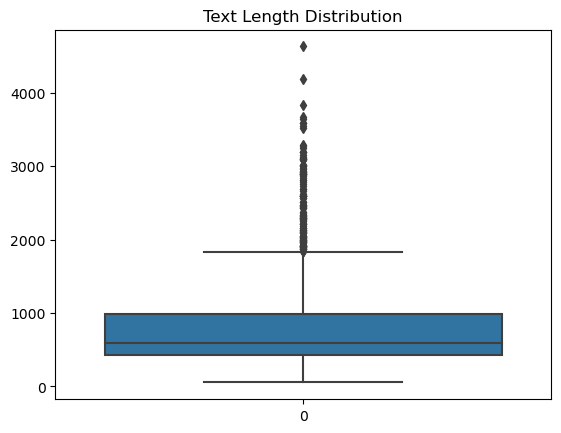

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column 'text_length' to the dataframe
# df['review'] = df['review'].apply(len)

# Visualize the distribution of text length using a boxplot
sns.boxplot(df['review_len'])
plt.title('Text Length Distribution')
plt.show()

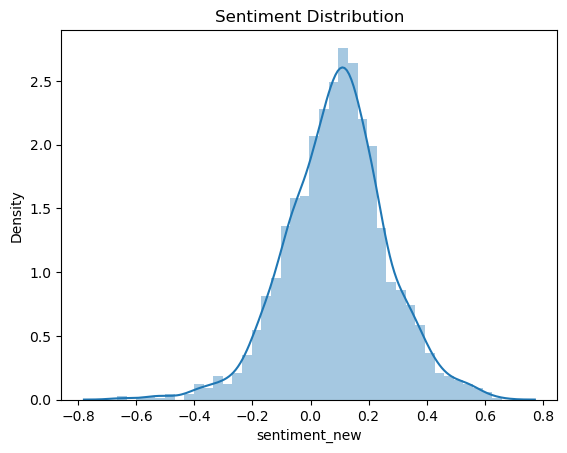

In [22]:


# sentiment Analysis 

from textblob import TextBlob

df['sentiment_new'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.distplot(df['sentiment_new'])
plt.title('Sentiment Distribution')
plt.show()

In [23]:
df.head()

,review,sentiment,review_len,tokens,pos_tags,named_entities,sentiment_new
0,one reviewer mentioned watching oz episode you...,positive,1125,"[one, reviewer, mentioned, watching, oz, episo...","[(one, CD), (reviewer, NN), (mentioned, VBD), ...",[],0.023881
1,wonderful little production filming technique ...,positive,640,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...",[],0.127604
2,thought wonderful way spend time hot summer we...,positive,580,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...",[],0.264732
3,basically there family little boy jake think t...,negative,446,"[basically, there, family, little, boy, jake, ...","[(basically, RB), (there, EX), (family, NN), (...",[],-0.042188
4,petter matteis love time money visually stunni...,positive,851,"[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...",[],0.244901


In [24]:
# df['pos_tags'] = df['pos_tags'].apply(preprocess_text)

# Count Vectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

# Transform the customer text data
X_count = count_vectorizer.fit_transform(df['review'])

# This will give you a sparse matrix. You can convert it to an array or dataframe if needed:
# X_count_array = X_count.toarray()

In [26]:
df.head(2)

,review,sentiment,review_len,tokens,pos_tags,named_entities,sentiment_new
0,one reviewer mentioned watching oz episode you...,positive,1125,"[one, reviewer, mentioned, watching, oz, episo...","[(one, CD), (reviewer, NN), (mentioned, VBD), ...",[],0.023881
1,wonderful little production filming technique ...,positive,640,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...",[],0.127604


In [27]:
from sklearn.model_selection import train_test_split

# Assuming 'severity' is your target column
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8275

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.82      0.82       195
    positive       0.83      0.84      0.83       205

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [29]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.8025

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.87      0.81       195
    positive       0.86      0.74      0.79       205

    accuracy                           0.80       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



# TF - IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Assuming 'customer_text' is a column in your DataFrame 'df' that contains text data
# Transform the customer text data
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])


In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'severity' is your target column
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.83      0.84       195
    positive       0.84      0.87      0.86       205

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [33]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.815

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.89      0.82       195
    positive       0.88      0.74      0.80       205

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



# Word2Vec

In [34]:
# 1. Preprocessing

# Assuming you have already preprocessed the 'customer_text' column 
# to some extent (like lowercase, punctuation removal etc.)
tokenized_texts = df['review'].apply(lambda x: x.split())

In [60]:
import multiprocessing

# Get the number of available cores
num_cores = multiprocessing.cpu_count()

num_cores

8

In [61]:
#2. Training word2Vec

from gensim.models import Word2Vec

# Training the model (consider adjusting parameters)
model_w2v = Word2Vec(sentences=tokenized_texts, vector_size=200, window=5, min_count=2, sg=1, hs=-1, negative=10, workers=8, seed=34)
model_w2v.train(tokenized_texts, total_examples=len(df['review']), epochs=20)

(4112810, 4649760)

In [57]:
#3. Vectorizing Texts 

import numpy as np

def compute_average_embedding(tokens, size, model_w2v):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec
wordvec_arrays = np.zeros((len(tokenized_texts), 200))

for i in range(len(tokenized_texts)):
    wordvec_arrays[i, :] = compute_average_embedding(tokenized_texts[i], 200, model_w2v)

X_word2vec = wordvec_arrays

In [58]:
# Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

logreg_w2v = LogisticRegression()
logreg_w2v.fit(X_train, y_train)

y_pred = logreg_w2v.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8275

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.85      0.83       195
    positive       0.85      0.81      0.83       205

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [38]:
# Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Initialize the model
# nb = MultinomialNB()
classifier = GaussianNB()

classifier.fit(X_train, y_train)

# Train the model
# nb.fit(X_train, y_train)

# Predictions
y_pred_nb = classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.7975

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.82      0.80       195
    positive       0.82      0.78      0.80       205

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [ ]:
# Glove
# FastText

# GLOVE

In [39]:
# Tokenize the customer_text data
tokenized_texts = df['review'].apply(lambda x: x.split())

In [42]:
# Loadxing Pre-trained Glove Vectors

embeddings_index = {}
f = open('glove.42B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 1917494 word vectors.


In [43]:
#2 Convert Text to GLOVE vectors
def get_glove_vector(tokens, dimension=300):
    vector = np.zeros((dimension,))
    count = 0
    for word in tokens:
        try:
            vec = embeddings_index[word]
            vector += vec
            count += 1
        except KeyError:
            continue
    if count != 0:
        vector /= count
    return vector

glove_vectors = np.array([get_glove_vector(tokens, dimension=300) for tokens in tokenized_texts])

In [45]:
#3 Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(glove_vectors, y, test_size=0.2, random_state=42)

logreg_glove = LogisticRegression()
logreg_glove.fit(X_train, y_train)

y_pred = logreg_glove.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8175

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.80      0.81       195
    positive       0.81      0.83      0.82       205

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



# FastText

In [46]:
# Training FastText Embeddings
from gensim.models import FastText

# Train a FastText model
model_fasttext = FastText(sentences=tokenized_texts, vector_size=200, window=5, min_count=5, workers=4, sg=1, epochs=100)


In [47]:
# 3. Preparing Vectorized Data

def word_vector_ft(tokens, size, model_fasttext):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_fasttext.wv[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_texts), 200))
for i in range(len(tokenized_texts)):
    wordvec_arrays[i, :] = word_vector_ft(tokenized_texts[i], 200, model_fasttext)

X_fasttext = wordvec_arrays

In [48]:
#4. Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

logreg_fasttext = LogisticRegression()
logreg_fasttext.fit(X_train, y_train)

y_pred = logreg_fasttext.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.83      0.82       195
    positive       0.83      0.81      0.82       205

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

